In [1]:
import cv2
import numpy as np

def detect_lines(image_path, line_kernels):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Apply the provided line kernels to enhance lines in the image
    for kernel in line_kernels:
        lines = cv2.filter2D(edges, -1, np.array(kernel))
        
        # Perform Hough Transform to detect lines
        lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)
        
        # Draw detected lines on the original image
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Display the result
    cv2.imshow('Line Detection', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the actual path to your image
image_path = 'red.jpg'

# Use the provided line kernels
line_kernels = [
    [[-1, -1, -1],
     [2, 2, 2],
     [-1, -1, -1]],
    
    [[2, -1, -1],
     [-1, 2, -1],
     [-1, -1, 2]],
    
    [[-1, 2, -1],
     [-1, 2, -1],
     [-1, 2, -1]],
    
    [[-1, -1, 2],
     [-1, 2, -1],
     [2, -1, -1]]
]

detect_lines(image_path, line_kernels)


In [2]:
import cv2
import numpy as np

def detect_lines(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Define the line kernels
    kernels = [
        np.array([[-1, -1, -1],
                  [2,  2,  2],
                  [-1, -1, -1]]),  # Horizontal line kernel
        
        np.array([[2, -1, -1],
                  [-1, 2, -1],
                  [-1, -1, 2]]),  # Vertical line kernel
        
        np.array([[-1, 2, -1],
                  [-1, 2, -1],
                  [-1, 2, -1]]),  # +45 degree line kernel
        
        np.array([[-1, -1, 2],
                  [-1,  2, -1],
                  [2,  -1, -1]])   # -45 degree line kernel
    ]
    
    # Apply the line kernels to enhance lines in the image
    for kernel in kernels:
        lines = cv2.filter2D(edges, -1, kernel)
        
        # Perform Hough Transform to detect lines
        hough_lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)
        
        # Draw detected lines on the original image
        if hough_lines is not None:
            for line in hough_lines:
                rho, theta = line[0]
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Display the result
    cv2.imshow('Line Detection', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the actual path to your image
image_path = 'red.jpg'
detect_lines(image_path)


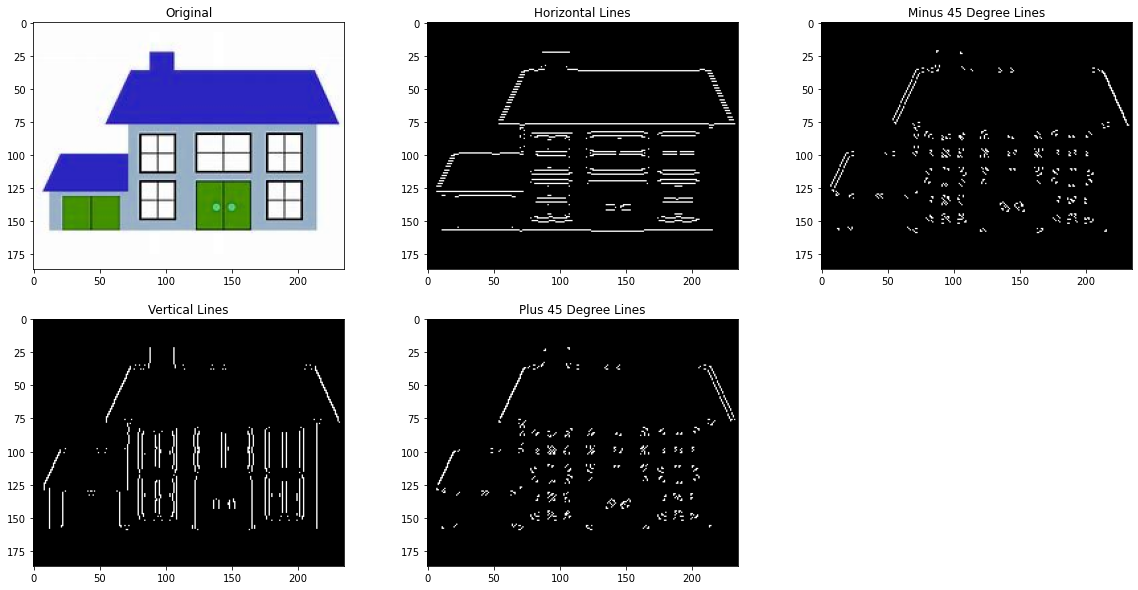

In [12]:
### Line Detection#####################################################
import cv2
import numpy as np
import matplotlib.pyplot as plt
def detect_lines(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Define the line kernels
    horizontal_kernel = np.array([[-1, -1, -1],
                                  [2, 2, 2],
                                  [-1, -1, -1]])

    minus_45_degree_kernel = np.array([[2, -1, -1],
                                       [-1, 2, -1],
                                       [-1, -1, 2]])

    vertical_kernel = np.array([[-1, 2, -1],
                                [-1, 2, -1],
                                [-1, 2, -1]])

    plus_45_degree_kernel = np.array([[-1, -1, 2],
                                      [-1, 2, -1],
                                      [2, -1, -1]])

    # Apply the kernels to enhance lines in the image
    horizontal_lines = cv2.filter2D(edges, -1, horizontal_kernel)
    minus_45_lines = cv2.filter2D(edges, -1, minus_45_degree_kernel)
    vertical_lines = cv2.filter2D(edges, -1, vertical_kernel)
    plus_45_lines = cv2.filter2D(edges, -1, plus_45_degree_kernel)

   # Display the results using Matplotlib
    plt.figure(figsize=(20, 10))
    plt.subplot(2,3,1)
    plt.imshow(image)
    plt.title('Original')
    
    plt.subplot(2,3,2)
    plt.imshow(horizontal_lines, cmap='gray')
    plt.title('Horizontal Lines')

    plt.subplot(2,3,3)
    plt.imshow(minus_45_lines, cmap='gray')
    plt.title('Minus 45 Degree Lines')

    plt.subplot(2,3,4)
    plt.imshow(vertical_lines, cmap='gray')
    plt.title('Vertical Lines')

    plt.subplot(2,3,5)
    plt.imshow(plus_45_lines, cmap='gray')
    plt.title('Plus 45 Degree Lines')

    plt.show()


image_path = 'red.jpg'
detect_lines(image_path)


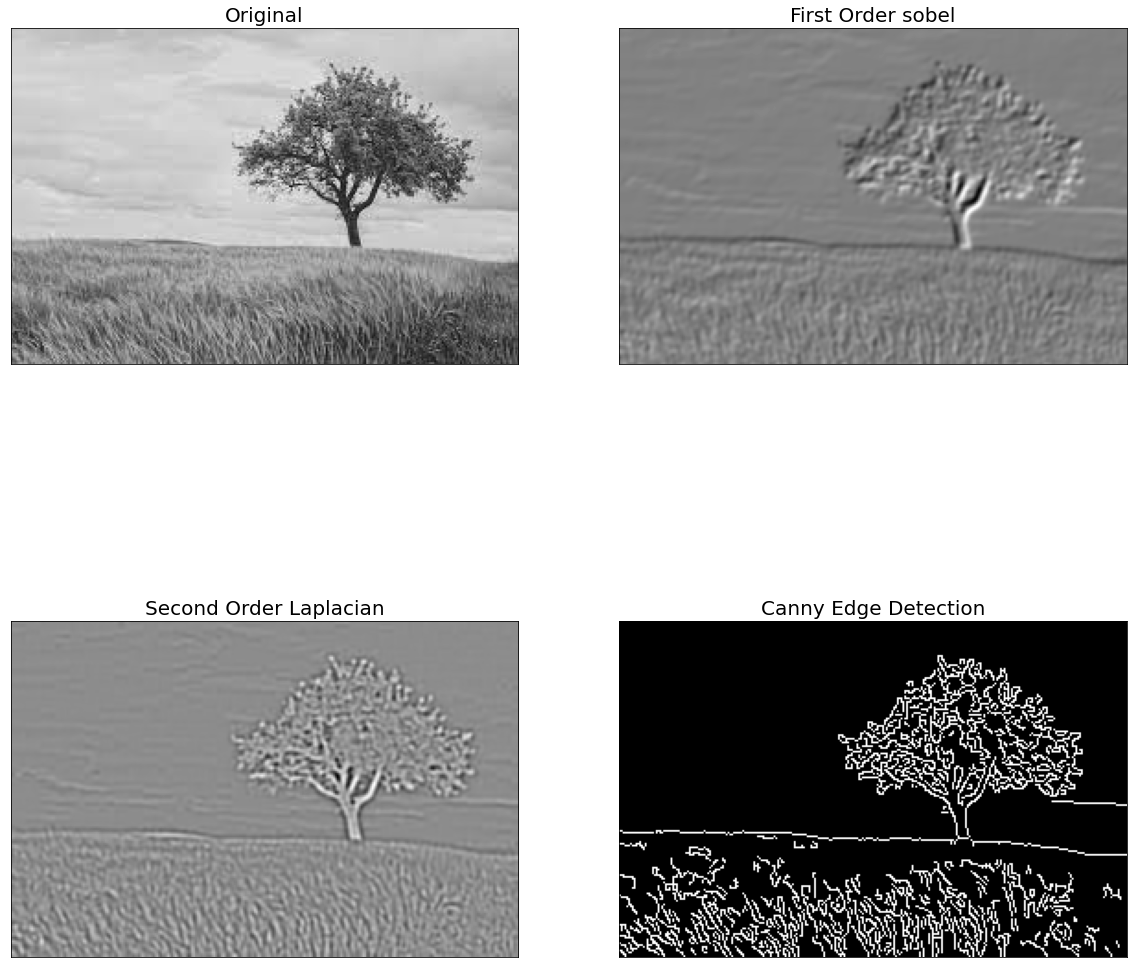

In [15]:
#Edge Detection
# Laplacian 2nd order derivative
# Sobel 1st Order Derivatives
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('new.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur_img = cv2.GaussianBlur(img, (3, 3), 0)

# Calculation of Sobelx 
sobelx = cv2.Sobel(blur_img,cv2.CV_64F,1,0,ksize=5) 
      
# Calculation of Sobely 
sobely = cv2.Sobel(blur_img,cv2.CV_64F,0,1,ksize=5) 
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

laplacian = cv2.Laplacian(blur_img, cv2.CV_64F, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
canny = cv2.Canny(blur_img,80,150)
output = [img,sobelxy, laplacian,canny]
titles = ['Original', 'First Order sobel','Second Order Laplacian','Canny Edge Detection']
plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i],fontsize=20)
    plt.xticks([])
    plt.yticks([])
plt.show()

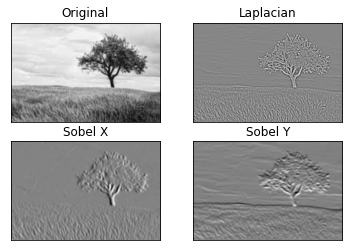

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('new.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [1]:
#Hough Transform
#HOugh line transform
import cv2
import numpy as np

# Load an image from file
image = cv2.imread('red.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  #5x5 kernel. 0 means automatically deviation values will be assigned

# Use the Canny edge detector to find edges
edges = cv2.Canny(blurred, 50, 150)  #gradient value above 150 are strong edges

# Use the Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
#print(lines)

# Draw the lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2.imshow('Hough Line Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()




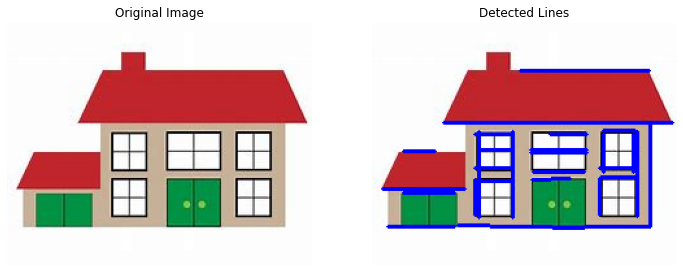

In [6]:

##################good one Hough transform#######
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('red.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

edges = cv2.Canny(blurred_image, 50, 150)

# Perform probabilistic Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=10, maxLineGap=5)

# Draw the detected lines on the original image
line_image = np.copy(image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image and the detected lines
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

plt.show()
